# Loan_Application_Stauts_Prediction

Problem Statement:
    
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

# EDA

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we have null values in dataset first will try to remove all null values

In [7]:
df['Gender']  = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we have removed all null values

In [9]:
df['Loan_ID'] = df['Loan_ID'].astype(str)
df['Gender'] = df['Gender'].astype(str)
df['Married'] = df['Married'].astype(str)
df['Dependents'] = df['Dependents'].astype(str)
df['Education'] = df['Education'].astype(str)
df['Self_Employed'] = df['Self_Employed'].astype(str)
df['Property_Area'] = df['Property_Area'].astype(str)
df['Loan_Status'] = df['Loan_Status'].astype(str)

In [10]:
collist = df.columns.values

for i in collist:
    print(f"Unique Value of {i} is \n {df[i].unique()}\n")

Unique Value of Loan_ID is 
 ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280'

converting categorical column into numeric using label encoder

In [11]:
col = df.columns
num_col = df._get_numeric_data().columns
cat_col =list(set(col)-set(num_col))
cat_col

['Gender',
 'Dependents',
 'Loan_Status',
 'Property_Area',
 'Self_Employed',
 'Loan_ID',
 'Married',
 'Education']

# Converting categorical data into numeric using Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [13]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [14]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Key Observation:

1. There is large difference between 75% and max in 'Loan_Id', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'
2. And there is difference between 25%,50%,75%  in some columns which indicates skewness is present.

# correlation:

In [15]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<AxesSubplot:>

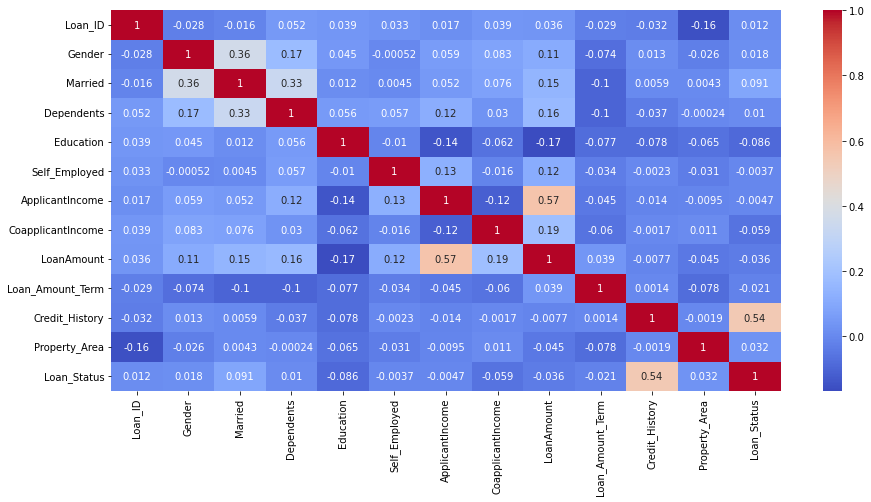

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Credit History is highly correlated with Target column

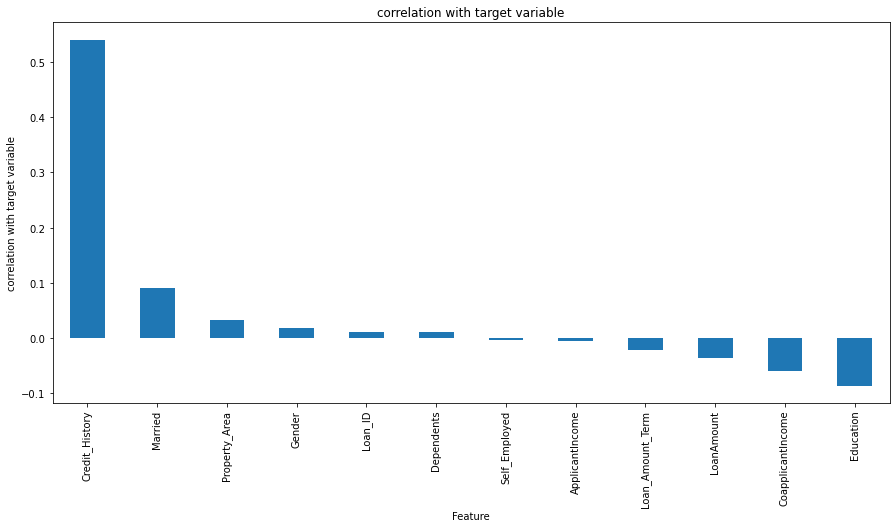

In [17]:
plt.figure(figsize=(15,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot.bar()
plt.xlabel("Feature")
plt.ylabel("correlation with target variable")
plt.title("correlation with target variable")
plt.show()

1. Credit_History is highly positive correlated with Target column
2. self_Employed, Dependents, Loan_ID, Gender, Property_Area, Married is in positive correlation with target column.
3. Education, CoapplicantIncome, LoanAmount, Loan_Amount_Term is negatively correlated with target column

# Data Visualization:

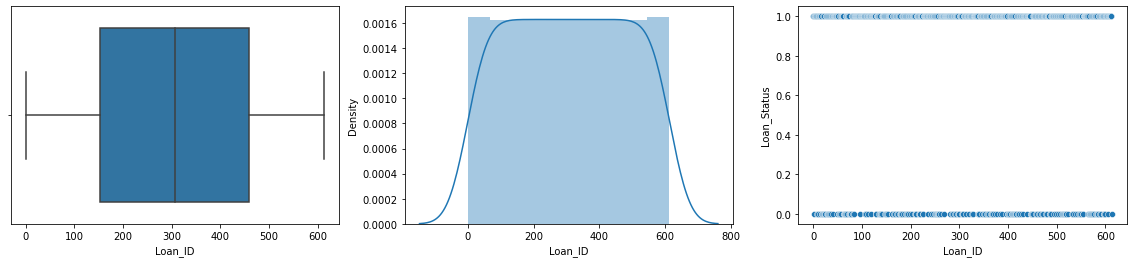

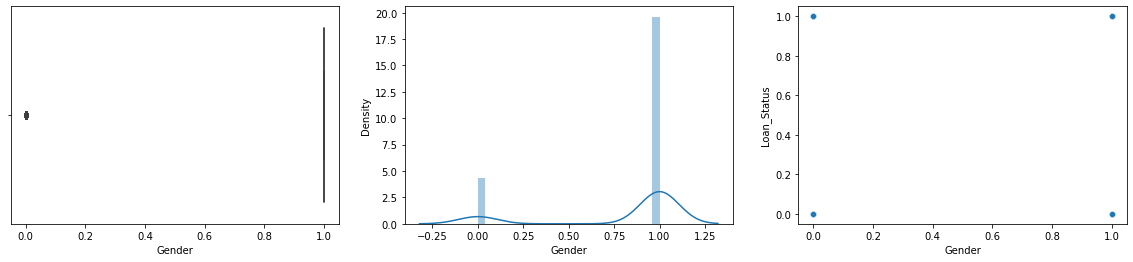

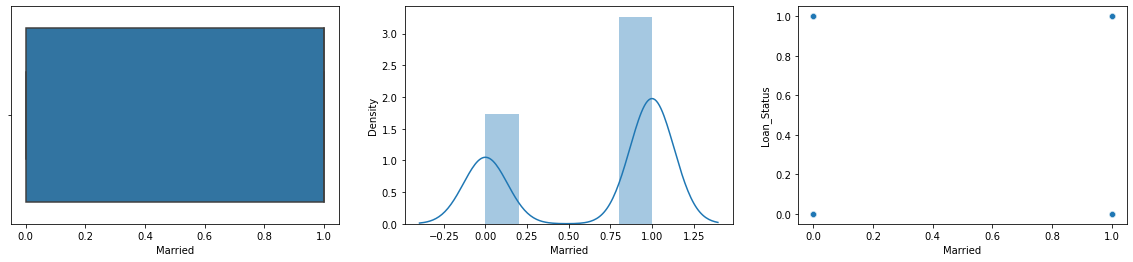

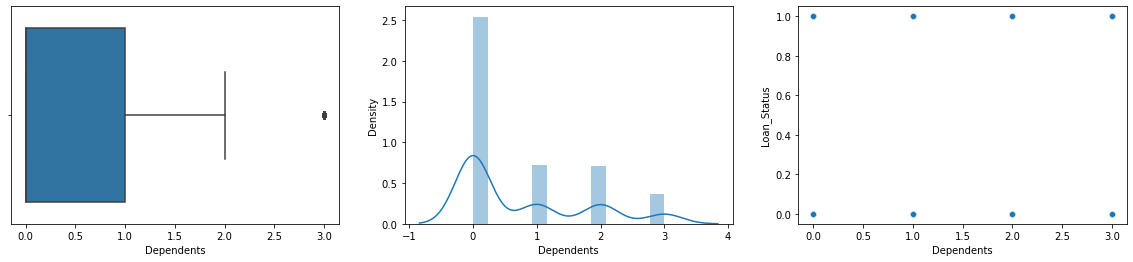

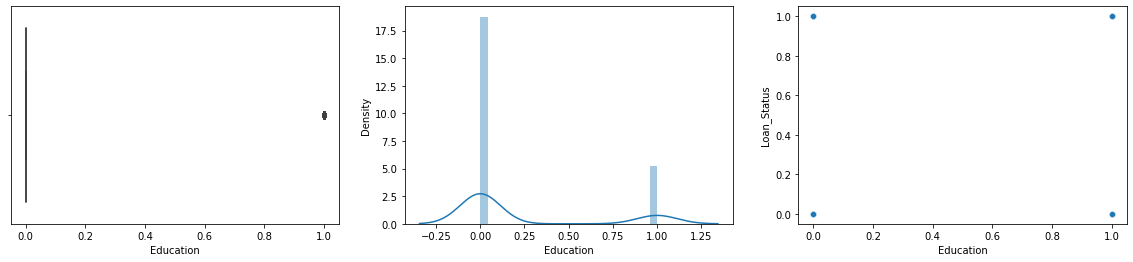

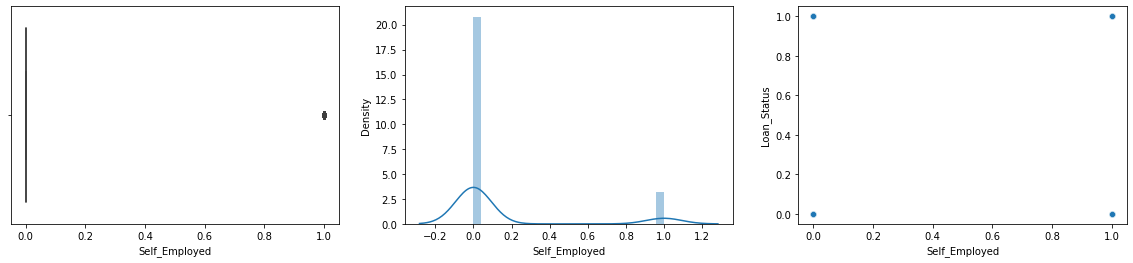

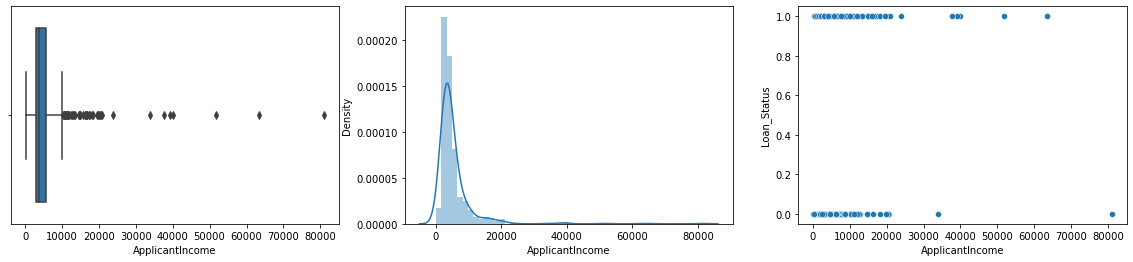

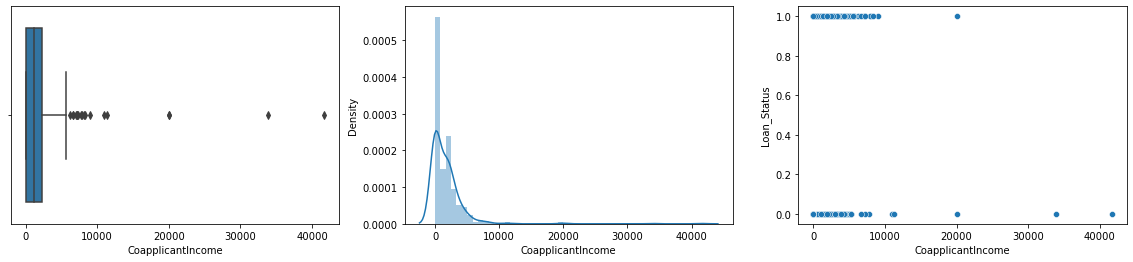

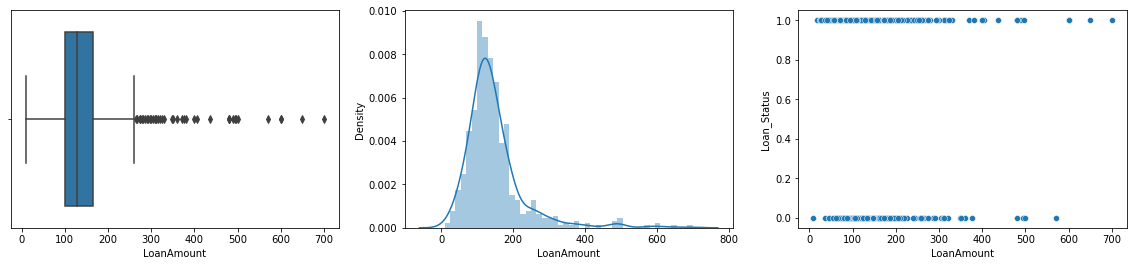

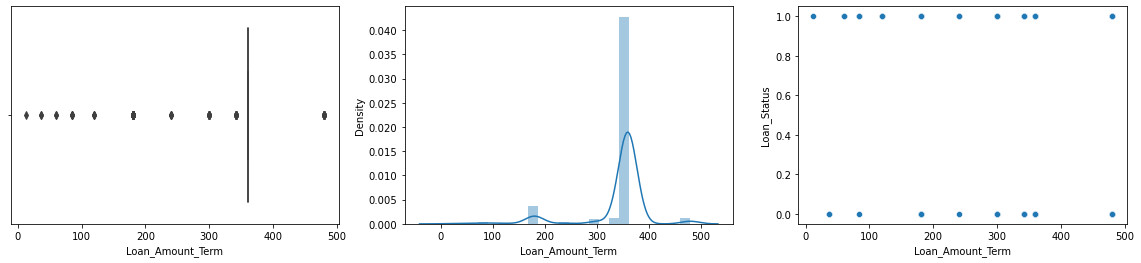

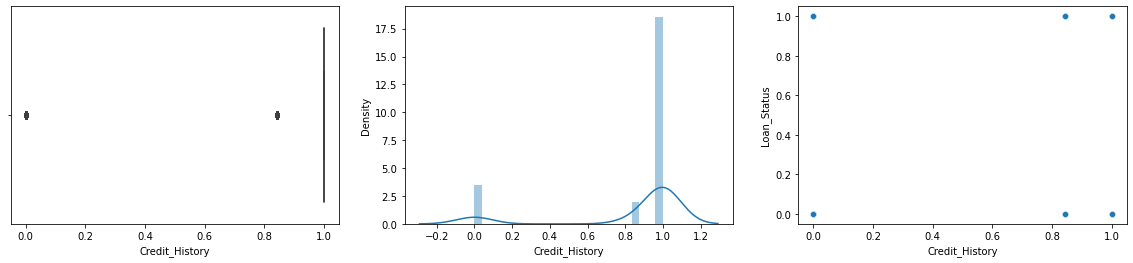

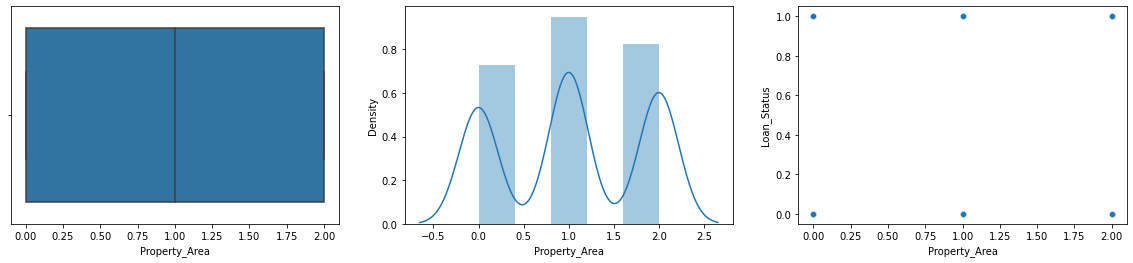

In [18]:
feature_variable = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
target_variable = 'Loan_Status'

def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a1 = sns.boxplot(x=df[feature_name],ax=axs[0])
    a2 = sns.distplot(df[feature_name],kde=True,ax = axs[1])
    a3 = sns.scatterplot(data=df,x=feature_name,y=target_variable,ax=axs[2])

for i in feature_variable:
     num_plots(i)
                        

By the above visualization we can find the relationship between feature and target variable.

# Detecting skewness:

In [19]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

by keeping +/-0.5 as skew value we can skewness is present in 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status'

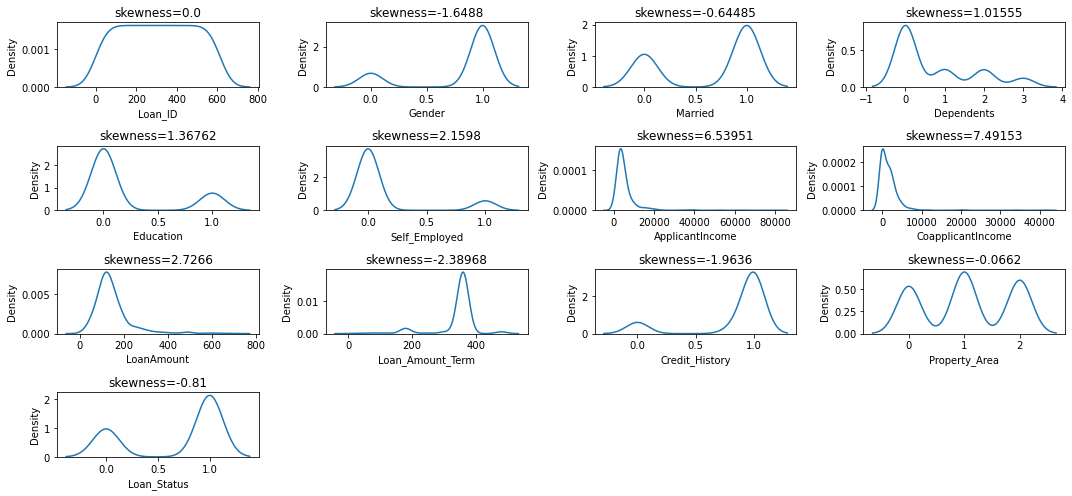

In [20]:
plt.figure(figsize=(15,7))
collist = df.columns.values
for i in range(0,len(collist)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness={round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Remove Skewness by power transform method

In [22]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')


In [23]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

5     2.159796
4     1.367622
3     0.441404
9     0.389827
8     0.024376
6    -0.092946
7    -0.145646
11   -0.158267
0    -0.287022
2    -0.644850
10   -1.599912
1    -1.648795
dtype: float64

In [24]:
x = pd.DataFrame((x_new),columns=x.columns)

# Detecting Outliers:

Loan_ID                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
Gender                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Dependents            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Self_Employed        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
ApplicantIncome      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
LoanAmount              AxesSubplot(0.125,0.321957;0.168478x0.16413)
Loan_Amount_Term     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Credit_History       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

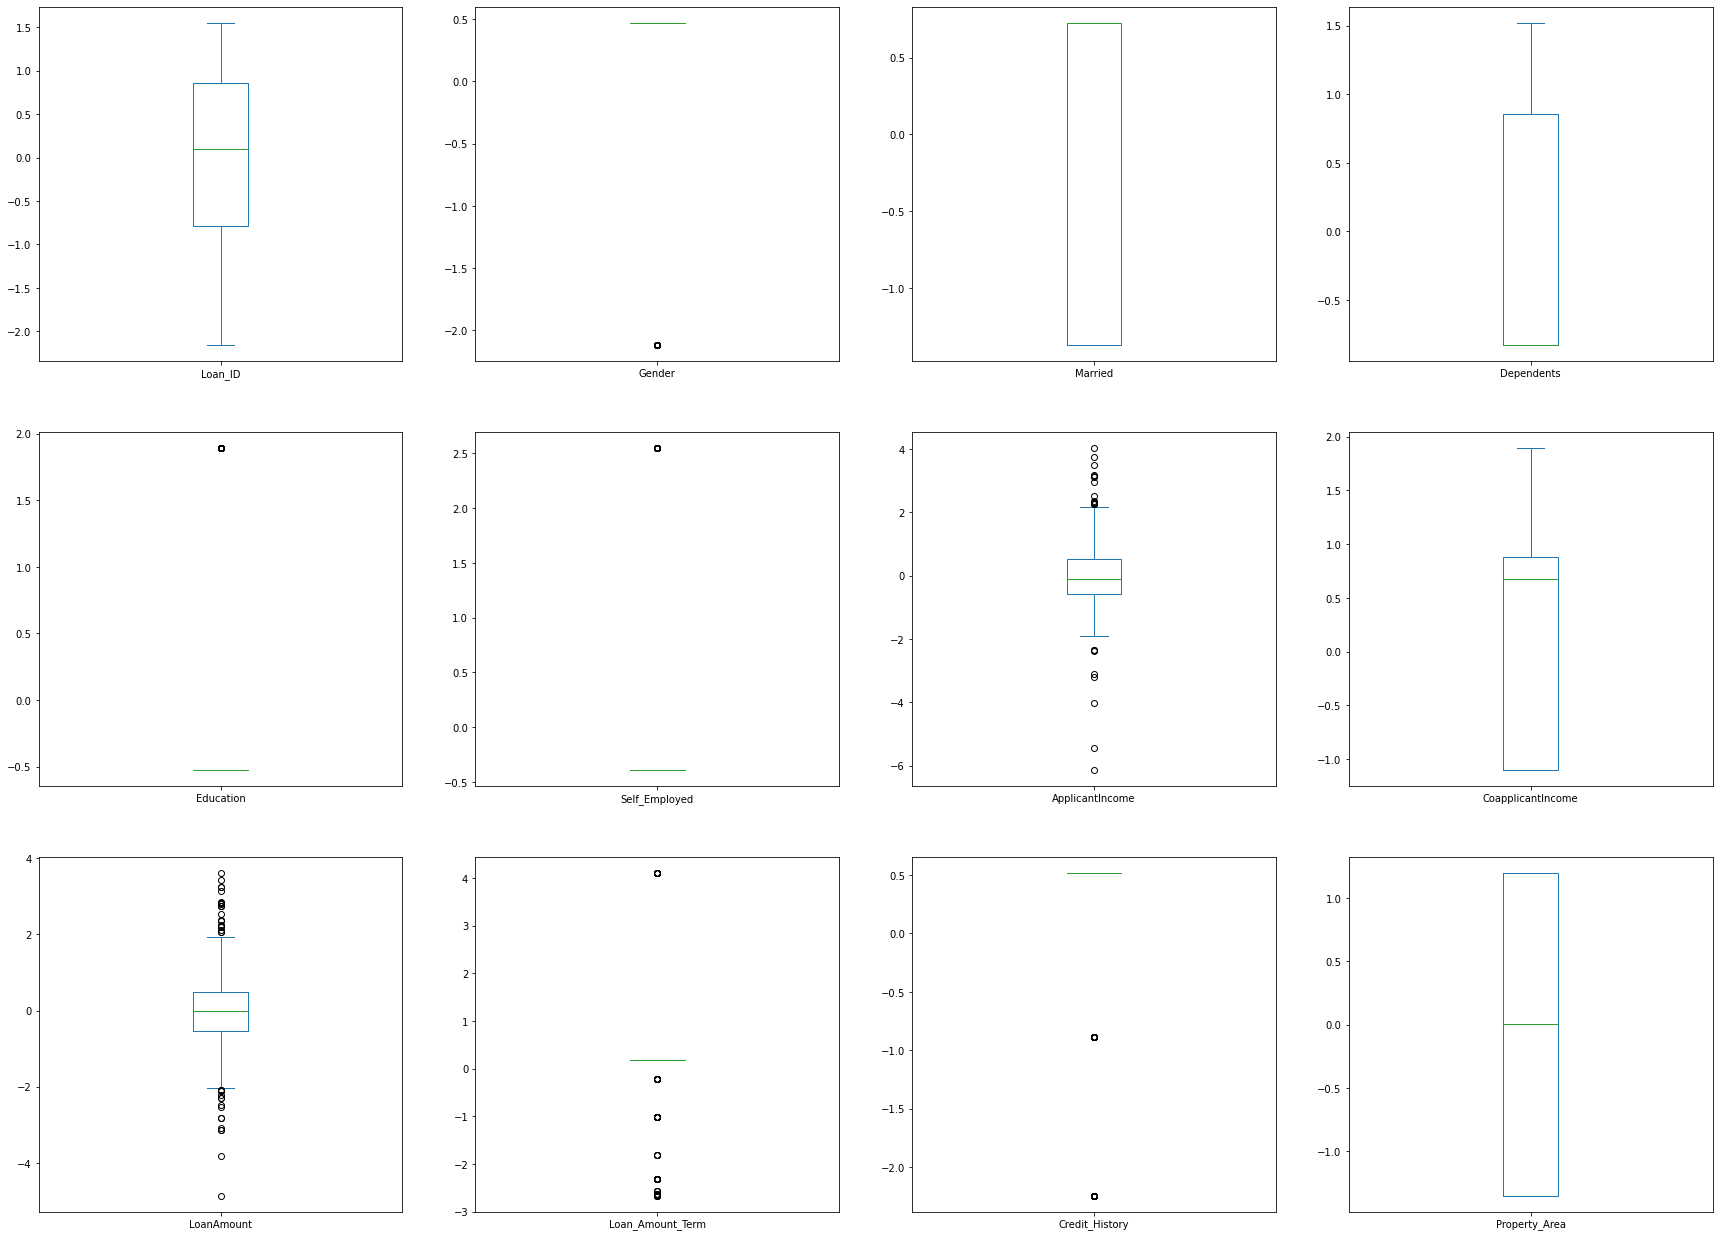

In [25]:
x.plot(kind='box',subplots='True',layout=(4,4),figsize=(30,30))

Outliers are present in 'Gender', 'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'

# Removing Outliers:

In [26]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
x_new = x[(z<3).all(axis=1)]

In [27]:
print("Old DataFrame : ",x.shape[0])
print("New DataFrame : ",x_new.shape[0])
print("Lost Rows : ",x.shape[0]-x_new.shape[0])

Old DataFrame :  614
New DataFrame :  582
Lost Rows :  32


In [28]:
percentage_loss = (614-582)/614*100
percentage_loss

5.211726384364821

there is 5% data loss so we can eliminate outliers from our dataset

# Scaling Data

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x_new)

# Multicolinearity:

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature'] = x.columns
vif

,VIF,feature
0,1.041805,Loan_ID
1,1.218455,Gender
2,1.406028,Married
3,1.200305,Dependents
4,1.079127,Education
5,1.054850,Self_Employed
6,2.017382,ApplicantIncome
7,1.636536,CoapplicantIncome
8,1.740574,LoanAmount
9,1.061419,Loan_Amount_Term


As all values are less there is no multicolinearity present

In [32]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Balancing Dataset using SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smt = SMOTE()
train_x,train_y = smt.fit_resample(x,y)


In [35]:
train_y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Training the model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [37]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=.22)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = accuracy_score(y_test,y_pred)
    if temp>acc:
        acc =temp
        best_rstate = i
print("Accuracy_Score : ",acc*100,"Random State : ",best_rstate)

Accuracy_Score :  88.97058823529412 Random State :  158


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=158,test_size=.22)

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


In [40]:
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
svc = SVC()
kn = KNeighborsClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()

model = [lr,gnb,dtc,svc,kn,rfc,ada]

In [41]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy score of ", m, " is ", accuracy_score(y_test,predm))
    print("Mean Squared Error is ", mean_squared_error(y_test,predm))
    print("Mean_Absolute Error is ",mean_absolute_error(y_test,predm))
    print("r2_score is ",r2_score(y_test,predm))
    print("\n")
    print("Confusion Matrix is ", confusion_matrix(y_test,predm))
    print("Classification report is ",classification_report(y_test,predm))

Accuracy score of  LogisticRegression()  is  0.8897058823529411
Mean Squared Error is  0.11029411764705882
Mean_Absolute Error is  0.11029411764705882
r2_score is  0.45220193340494086


Confusion Matrix is  [[27 11]
 [ 4 94]]
Classification report is                precision    recall  f1-score   support

           0       0.87      0.71      0.78        38
           1       0.90      0.96      0.93        98

    accuracy                           0.89       136
   macro avg       0.88      0.83      0.85       136
weighted avg       0.89      0.89      0.89       136

Accuracy score of  GaussianNB()  is  0.8676470588235294
Mean Squared Error is  0.1323529411764706
Mean_Absolute Error is  0.1323529411764706
r2_score is  0.342642320085929


Confusion Matrix is  [[29  9]
 [ 9 89]]
Classification report is                precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.91      0.91      0.91        98

    accuracy     

Here we have Linear Regression with 88% accuracy. Lets do Cross Validation to check its accuracy

# Cross Validation:

In [42]:
from sklearn.model_selection import cross_val_score,cross_val_predict
mean = []
std = []

for m in model:
    CV = cross_val_score(m,x,y,cv=5)
    print("Score of ",m,"is", CV)
    print("Mean Score of ",m ,"is",CV.mean())
    mean.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print("\n")

Score of  LogisticRegression() is [0.81300813 0.76422764 0.75609756 0.84552846 0.81967213]
Mean Score of  LogisticRegression() is 0.7997067839530854
Standard Deviation is  0.03416343157189764


Score of  GaussianNB() is [0.78861789 0.72357724 0.7398374  0.78861789 0.78688525]
Mean Score of  GaussianNB() is 0.7655071304811408
Standard Deviation is  0.028079491069157497


Score of  DecisionTreeClassifier() is [0.76422764 0.5203252  0.70731707 0.77235772 0.69672131]
Mean Score of  DecisionTreeClassifier() is 0.6921897907503665
Standard Deviation is  0.09099797282984168


Score of  SVC() is [0.80487805 0.75609756 0.7804878  0.83739837 0.81147541]
Mean Score of  SVC() is 0.7980674396907904
Standard Deviation is  0.02772578125666397


Score of  KNeighborsClassifier() is [0.77235772 0.70731707 0.75609756 0.79674797 0.80327869]
Mean Score of  KNeighborsClassifier() is 0.7671598027455684
Standard Deviation is  0.03438190587843256


Score of  RandomForestClassifier() is [0.74796748 0.75609756 0.

Here we have LogisticRegression with 79% accuracy.
We can further improve accuracy using HyperTuning

# HyperTuning

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
parameters = {'learning_rate':[0.001,0.01,0.5,0.1],
             'subsample':[0.9,0.5,0.3,0.2],
             'n_estimators':[100,150,200,250],
             'max_depth':[4,5,6,9]}

grid_GBR = GridSearchCV(estimator=GBR,param_grid=parameters,cv=2,n_jobs=1)
grid_GBR.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.5, 0.1],
                         'max_depth': [4, 5, 6, 9],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [0.9, 0.5, 0.3, 0.2]})

In [44]:
grid_GBR.best_score_

0.21158524989081756

In [45]:
print("Results from Grid Search : ")
print("\n The best estimator across all search params :",grid_GBR.best_estimator_)
print("\n The best score for all searched params :",grid_GBR.best_score_)
print("\n The best parameters for all searched params : ",grid_GBR.best_params_)

Results from Grid Search : 

 The best estimator across all search params : GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=250,
                          subsample=0.5)

 The best score for all searched params : 0.21158524989081756

 The best parameters for all searched params :  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 250, 'subsample': 0.5}


we have Linear Regressor with 79% before hypertuning

# AUC-ROC Curve

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [47]:
y_pred_proba = lr.predict_proba(x_test)[:,-1]

In [48]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

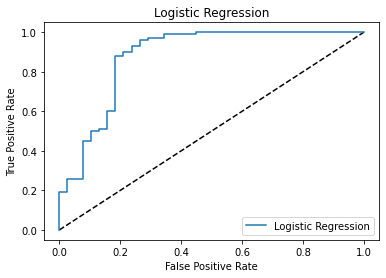

In [50]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [51]:
auc_score = roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.8348549946294308


we are having 83% accuracy with auc_roc

# Saving Best Model:

In [52]:
import joblib
joblib.dump(lr,'Loan_Application_Status.obj')

['Loan_Application_Status.obj']

In [53]:
pred = lr.predict(x_test)
final = pd.DataFrame(pred)
final

,0
0,1
1,1
2,1
3,0
4,0
...,...
131,1
132,1
133,1
134,1
